In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.corr().tail(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
target,-0.229324,-0.279501,0.434854,-0.138772,-0.099966,-0.041164,0.134468,0.422895,-0.438029,-0.438441,0.345512,-0.382085,-0.337838,1.0


In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [37]:
# X = df.drop(columns = 'target')
X = df.drop(columns = ['fbs', 'restecg', 'target'])
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

<Axes: >

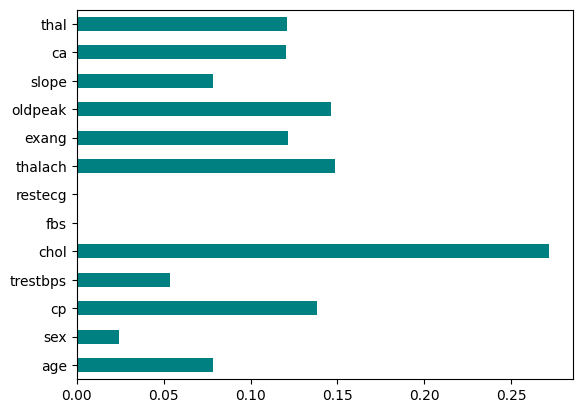

In [16]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(X, y)
feat_imp = pd.Series(imp, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind = 'barh', color = 'teal')

In [20]:
X_train.shape

(820, 11)

In [21]:
X_test.shape

(205, 11)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [23]:
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()

In [39]:
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [40]:
log_reg.score(X_test, y_test)

0.8634146341463415

In [41]:
dec_tree.score(X_test, y_test)

0.9804878048780488

In [42]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
y_pred_log = log_reg.predict(X_test)

In [44]:
y_pred_dec = dec_tree.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [60]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log

array([[84, 21],
       [ 7, 93]])

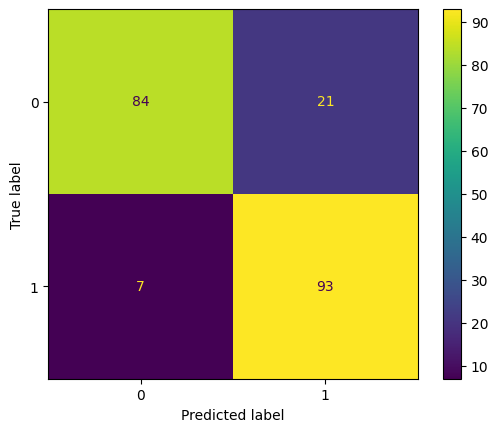

In [62]:
cm_disp_log = ConfusionMatrixDisplay(cm_log, display_labels = log_reg.classes_)
cm_disp_log.plot()

In [63]:
cm_dec = confusion_matrix(y_test, y_pred_dec)
cm_dec

array([[101,   4],
       [  0, 100]])

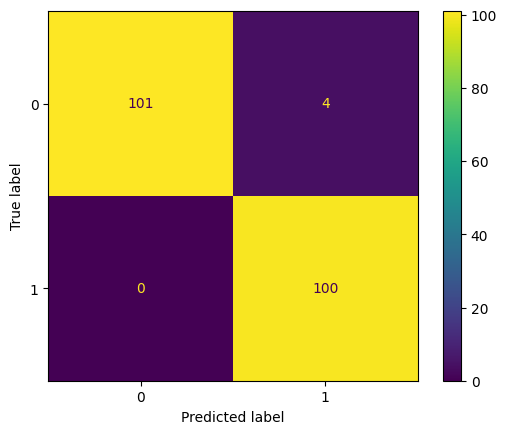

In [65]:
cm_disp_dec = ConfusionMatrixDisplay(cm_dec, display_labels = dec_tree.classes_)
cm_disp_dec.plot()

In [66]:
cm_dec.ravel()

array([101,   4,   0, 100])

In [67]:
tn, fp, fn, tp = cm_dec.ravel()

In [68]:
print(tn, fp, fn, tp)

101 4 0 100


In [69]:
acc = (tp + tn) / (tn + fp + fn + tp)
acc

0.9804878048780488

In [70]:
precision = tp / (tp + fp)
precision

0.9615384615384616

In [71]:
recall = tp / (tp + fn)
recall

1.0

In [72]:
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

0.9803921568627451

In [52]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       105
           1       0.82      0.93      0.87       100

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [53]:
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98       100

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

